Notebook used to display to the screen the captured images as well as the manually tagged line positions

In [1]:
import numpy as np

import ipywidgets as widgets
from ipywidgets import HBox
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import time

In [2]:
# load the captured images from file
images = np.load('trackTrainImages_210624.npy')
pos = np.load('trackPos_210624.npy')

# get shape of the array used to store the images
images.shape

(380, 224, 224, 3)

In [3]:
# get the tagged positions 
pos.shape

(380,)

In [4]:
# convert the first stored image to binary format for display to screen 
is_success, im_buf_arr = cv2.imencode(".jpg", images[0])
byte_im = im_buf_arr.tobytes()

Create widgets to display the captured images with their associated tagged centerline positions

In [5]:
startButton = widgets.Button(
                    description='Start',
                    disabled=False,
                    button_style='', 
                    tooltip='Start',
                    icon='check' 
                )


# create the image display widget
imgDisp = widgets.Image(
            value=byte_im,
            format='png',
            width=300,
            height=400,
        )

# create the output widget for text message
output = widgets.Output()

# pit the widgets in a horizontal box
d = HBox([imgDisp, output, startButton])


# display to the screen the widgets
display(d)

# function to execute on start button. The function displays to the screen the captured image and the tag
def on_button_clicked(b):
    
        for i in range(len(images)):
        
            # get image and convert to binary
            is_success, im_buf_arr = cv2.imencode(".jpg", images[i])
            byte_im = im_buf_arr.tobytes()

            # set the image of display
            imgDisp.value = byte_im
            
            # output the position of the centerline associated with the image
            with output:
                
                output.clear_output()
                print(str(pos[i]))

            time.sleep(0.05)


startButton.on_click(on_button_clicked)

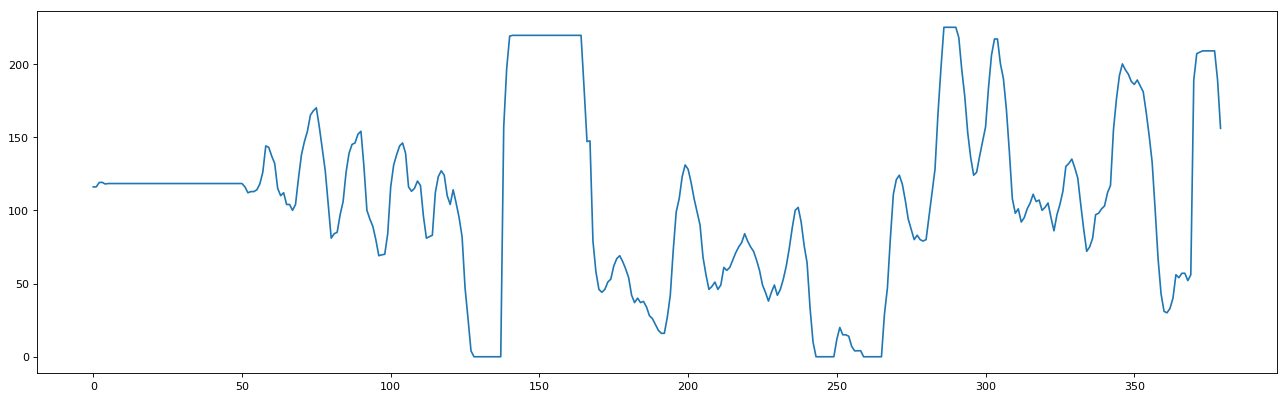

In [9]:

fig, ax = plt.subplots(figsize=(20, 6), dpi=80)

ax.plot(pos)